In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
def draw_factorPlot(dataframe, ycol='somecolumn', xcol='somecolumn', kinda='bar', rotate=60, ylabel='somelabel'):
    sns.set(style="darkgrid")

    g = sns.catplot(data=dataframe,y=ycol, x=xcol, height=12, kind=kinda, palette="pastel", ci=95);
    # g.despine(left=True)
    g.set_xticklabels(rotation=rotate)
    g.set_ylabels(ylabel)
    g.set_xlabels("Volume")

In [5]:
avocados = pd.read_csv('avocado.csv') # The index is Date.  Add ,index_col=1 for making the date an index.
avocados = avocados.loc[:, ~avocados.columns.str.contains('^Unnamed')] # Removed the unnamed fistcolumn.
avocados.rename(index=str, columns={"Total Volume": "TotalVolume", "Total Bags": "TotalBags", "Small Bags" : "SmallBags",
                                    "Large Bags" : "LargeBags", "XLarge Bags" : "XLargeBags"}, inplace=True) # let's remove the spaces
avocados['Date'] = avocados.Date.astype('datetime64')  
avocados.sort_values(by='Date', ascending=True, inplace=True)
avocados.set_index('Date', inplace=True)

In [6]:
#Let's set the context to avocados in San Diego in 2016
avocados_2016 = avocados[(avocados['year'] == 2016)] # all avocado information for 2016
avocados_sd = avocados[(avocados['region'] == 'SanDiego')] # all avocado information for San Diego
avocados_sd_2016 = avocados[(avocados['year'] == 2016) & (avocados['region'] == 'SanDiego')]

# part I - setup the data to plot 4 different ways 
avocados_sd_sample = avocados_sd_2016.sample(30)
avocados_sd_sample = avocados_sd_sample.sort_values(by='Date', ascending=True)

In [85]:
#global variables
rotation_angle = 45

In [86]:
# Grouping by region groupings
grouping_columns = ['region', 'AveragePrice', 'TotalVolume']
sort_by_aggregate = ['mean']

avocados_group_by_region = avocados.groupby(grouping_columns[0])[grouping_columns].agg(sort_by_aggregate)

In [87]:
avocados_sd_sample.describe()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,1.279667,343477.648000,110029.685333,100419.012667,11609.016667,121419.933333,89689.689333,31412.231667,318.012333,2016.0
std,0.601231,280756.937669,94438.747404,80997.518330,10494.823318,104154.700881,79501.064687,44042.886796,537.239437,0.0
min,0.650000,8533.850000,653.460000,6533.700000,0.000000,545.670000,444.060000,0.000000,0.000000,2016.0
25%,0.852500,16344.822500,1864.445000,9339.580000,4.787500,5715.802500,2740.792500,1056.930000,0.000000,2016.0
50%,1.065000,486142.955000,153378.670000,134667.010000,13981.195000,152713.910000,107305.125000,11838.070000,0.000000,2016.0
75%,1.482500,578093.967500,192929.272500,159795.107500,21903.230000,212140.790000,156466.292500,37986.632500,409.377500,2016.0
max,2.740000,719749.770000,244514.340000,256691.540000,32042.580000,288428.480000,218488.210000,155614.620000,1765.560000,2016.0


## Assignment:  Plot the variable 4 different ways

1.  Choose one variable and plot that variable four different ways, A, B, C, D.
2.  Choose two continuous variables, and plot them three different ways, A, B, C.
3.  Choose one continuous variable and one categorical variable, and plot them six different ways, A, B, C, D, E, F.

### Section 1

In [88]:
x=avocados_sd['AveragePrice']

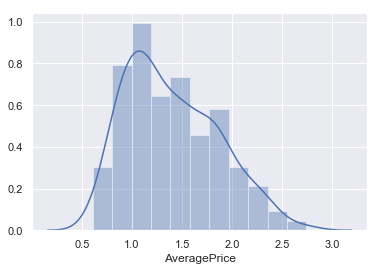

In [89]:
# This is a one dimensional plot for the Average Price of Avocados in San Diego
# 1a -> distplot

sns.distplot(x)

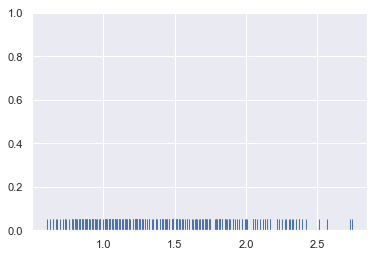

In [90]:
# 1b -> rugplot
sns.rugplot(x)

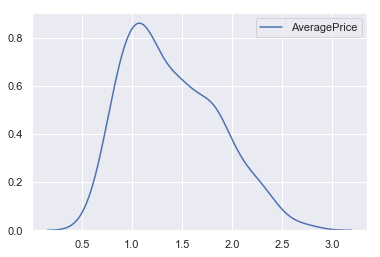

In [91]:
# 1c -> kdeplot
sns.kdeplot(x)

In [92]:
head_value = 1000
# print(avocados_sd_2016['AveragePrice'].head(head_value), avocados_sd_2016['TotalVolume'].head(head_value))

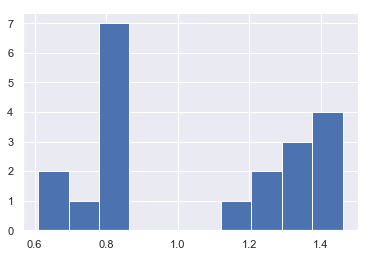

In [93]:
# 1d -> historgram
plt.hist(avocados_sd_2016['AveragePrice'].head(n=20))
plt.show()

### Section 2

Choose two continuous variables and plot them three different ways.

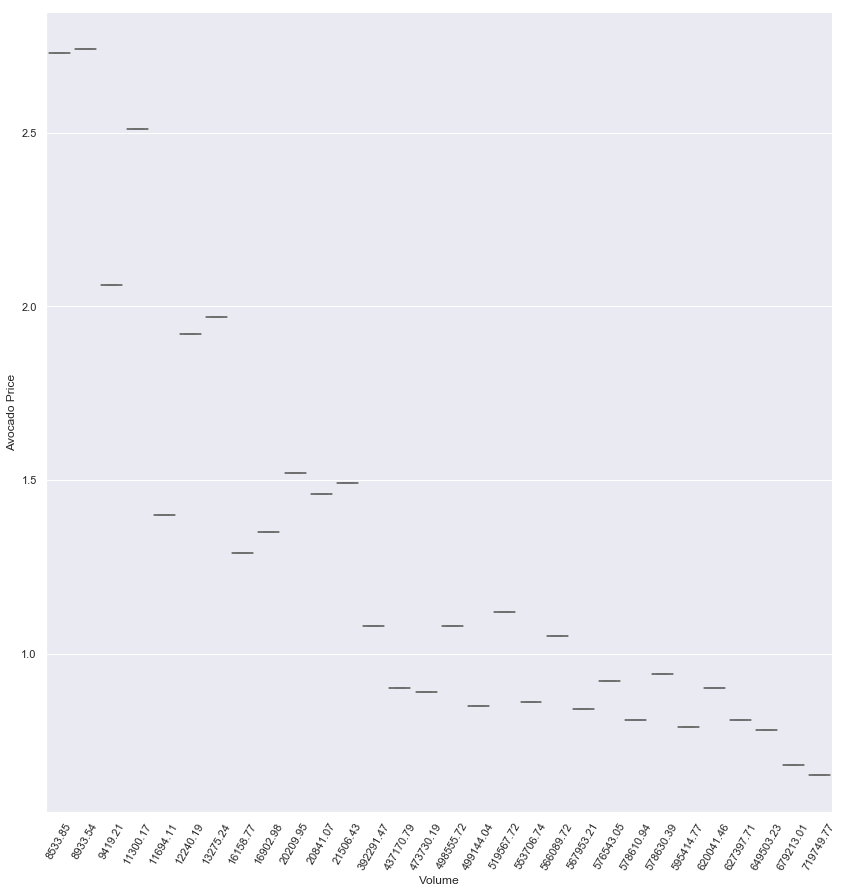

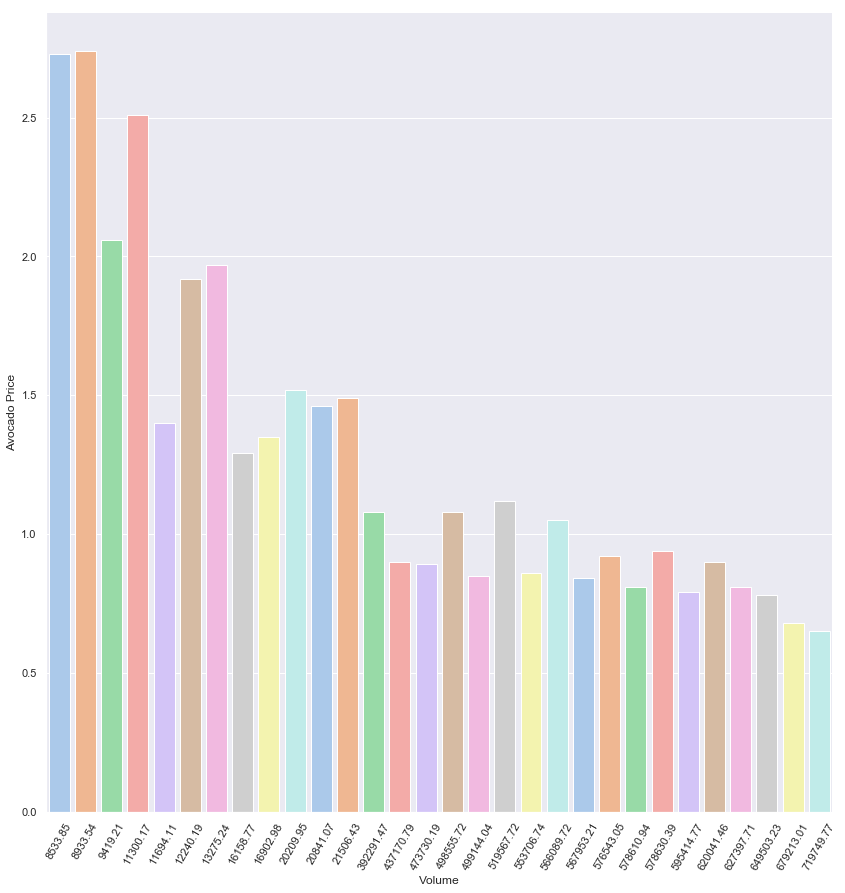

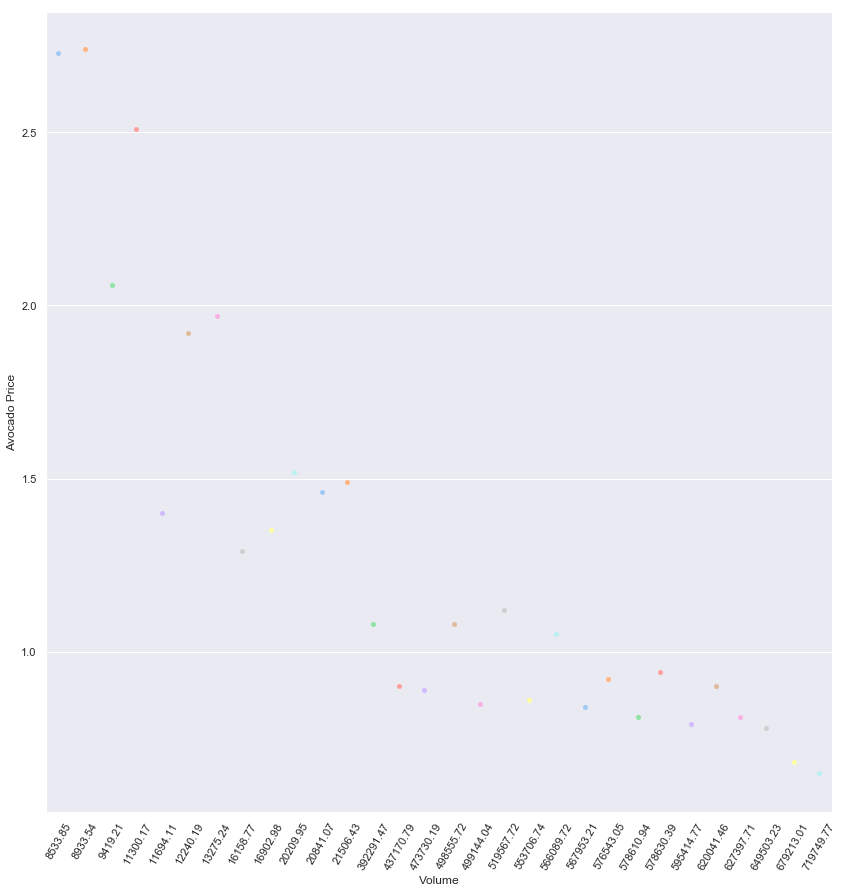

In [94]:
# 2-A, 2-B, 2-C
factor_plots = ['box', 'bar', 'strip']
for catplot in factor_plots:
    draw_factorPlot(avocados_sd_sample, ycol='AveragePrice', xcol='TotalVolume', kinda=catplot, ylabel="Avocado Price", rotate=60);

### Section 3

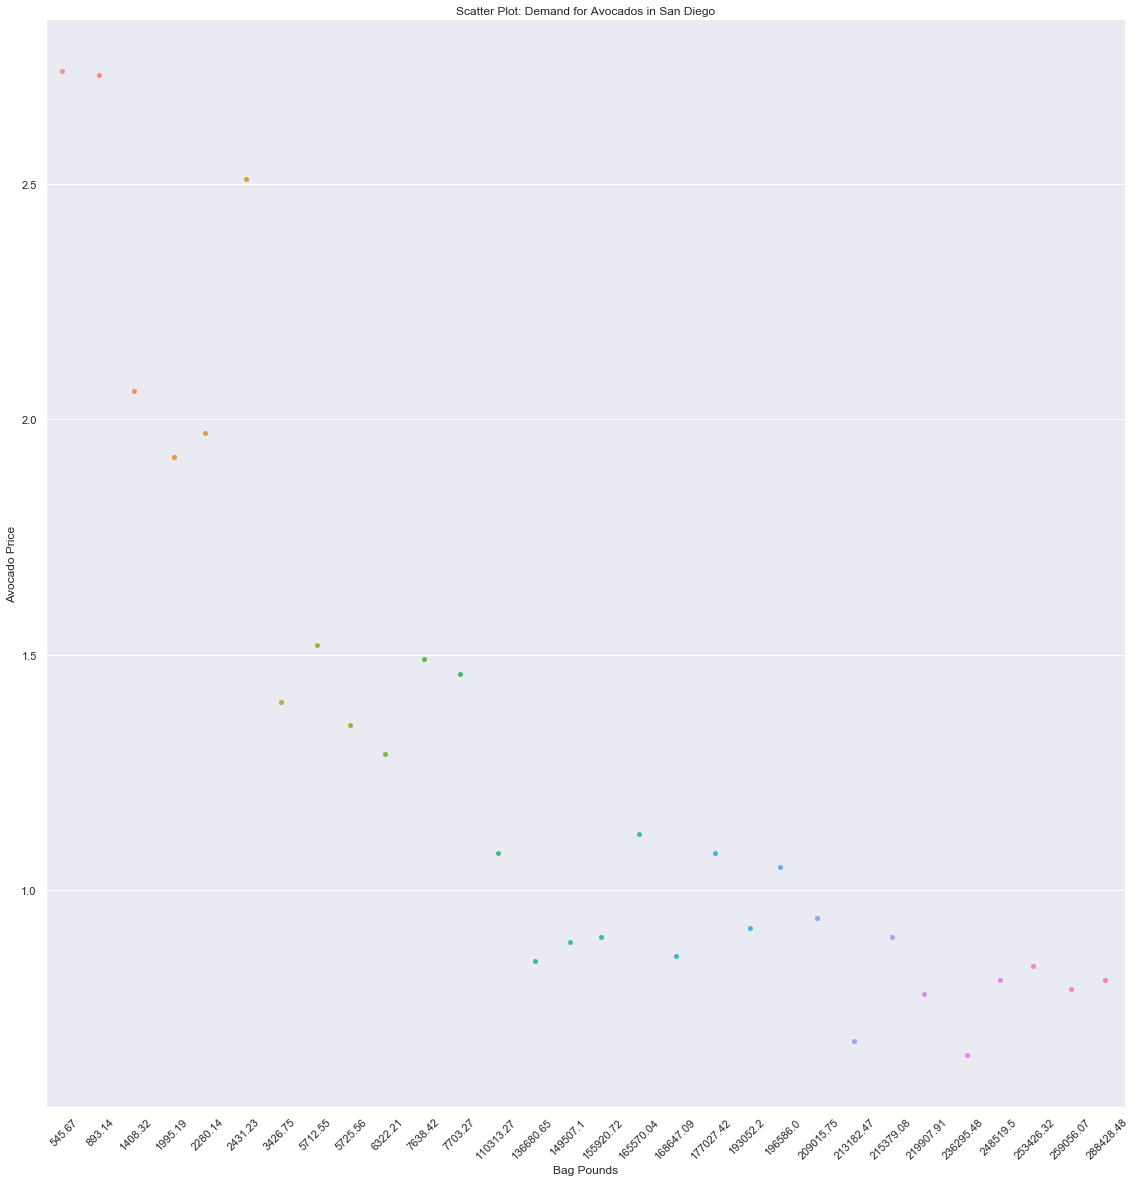

In [95]:
# seaborn bar plot
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.catplot(x='TotalBags', y="AveragePrice", data=avocados_sd_sample,
                 
                   height=16)
g.set_xticklabels(rotation=rotation_angle)
g.set_ylabels("Avocado Price")
g.set_xlabels("Bag Pounds")
plt.title('Scatter Plot: Demand for Avocados in San Diego')
plt.show()

In [96]:
# Grouping by region groupings
grouping_columns = ['region', 'AveragePrice', 'TotalVolume']
sort_by_aggregate = ['mean']
avocados_group_by_region = avocados.groupby(grouping_columns[0])[grouping_columns].agg(sort_by_aggregate)

In [97]:
avocados_group_by_region.head(10)

,AveragePrice,TotalVolume
,mean,mean
region,,
Albany,1.561036,4.753787e+04
Atlanta,1.337959,2.621453e+05
BaltimoreWashington,1.534231,3.985619e+05
Boise,1.348136,4.264257e+04
Boston,1.530888,2.877929e+05
BuffaloRochester,1.516834,6.793630e+04
California,1.395325,3.044324e+06
Charlotte,1.606036,1.051939e+05


In [98]:
avocados_sd.index.shape

(338,)

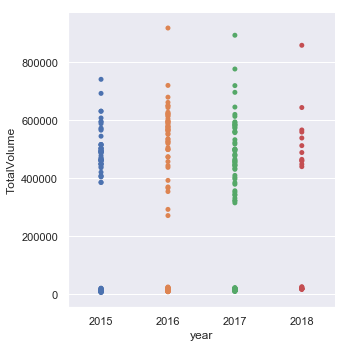

In [99]:
# 3.a -> A Seaborn Scatterplot
# sns.catplot(x="year", y="TotalVolume", data=avocados)
sns.catplot(x='year', y="TotalVolume", jitter=False, data=avocados_sd)

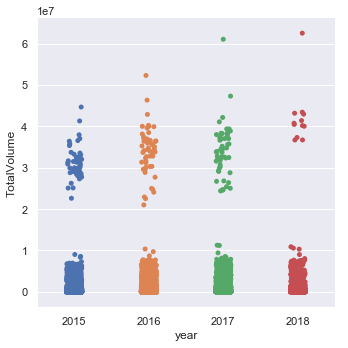

In [100]:
# 3.b -> A Seaborn Swarm
sns.catplot(x="year", y="TotalVolume", jitter=True, data=avocados)

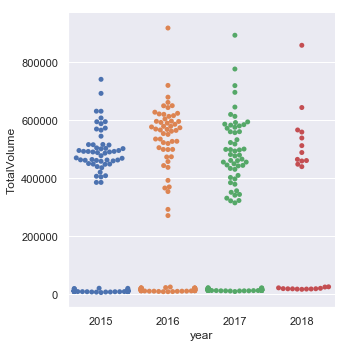

In [101]:
# 3.b -> A Seaborn Swarm
sns.catplot(x="year", y="TotalVolume", kind="swarm", data=avocados_sd)

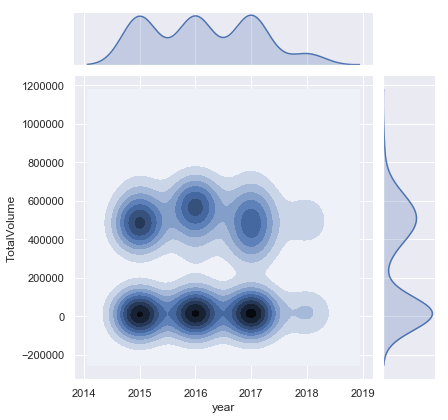

In [102]:
# 3.c -> A Seaborn Hexbin plot
sns.jointplot(x='year', y='TotalVolume', kind='kde' ,data=avocados_sd)

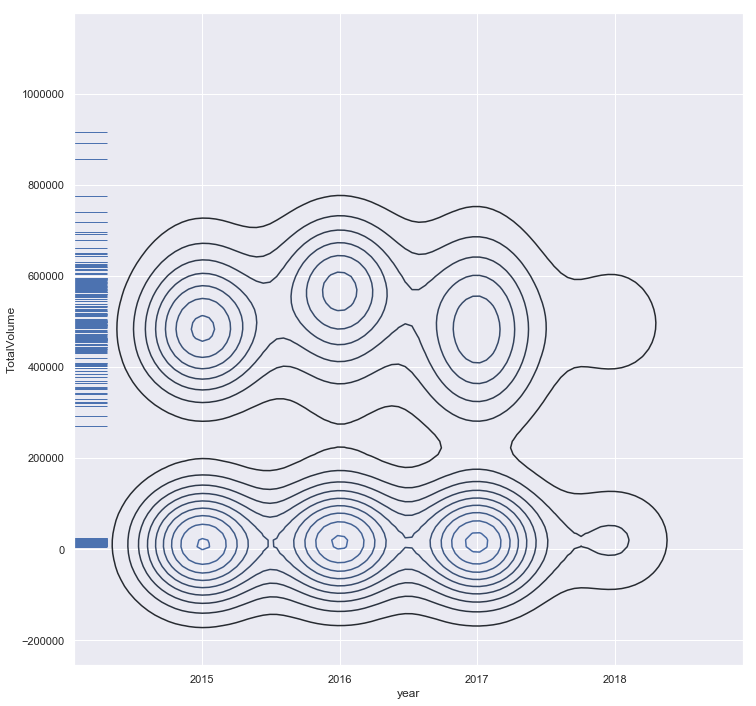

In [103]:
# 3.d -> A 2 dimensional kernel density plot with kdeplot 
f, ax = plt.subplots(figsize=(12,12))
sns.kdeplot(avocados_sd.year,avocados_sd.TotalVolume, ax=ax)
sns.rugplot(avocados_sd.TotalVolume, vertical=True, ax=ax)

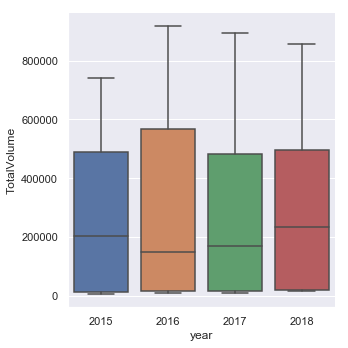

In [104]:
# 3.e -> A boxplot 
sns.catplot(x="year", y="TotalVolume", kind="box", data=avocados_sd)

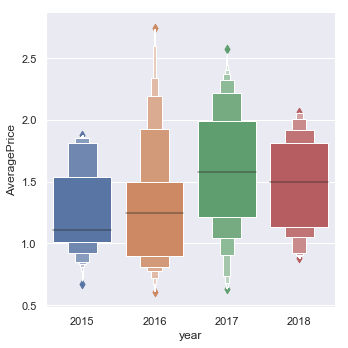

In [105]:
# 3.f -> A boxen plot
g = sns.catplot(x='year', y='AveragePrice', data=avocados_sd.sort_values("year"),
               kind="boxen")

## Challenge - another dataset with 4 continuous variables, with 1 categorical variable
### Australian weather

In [14]:
weatherAUS = pd.read_csv('weatherAUS.csv') #
weatherAUS_sample = weatherAUS.sample(200)

In [18]:
weatherAUS.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

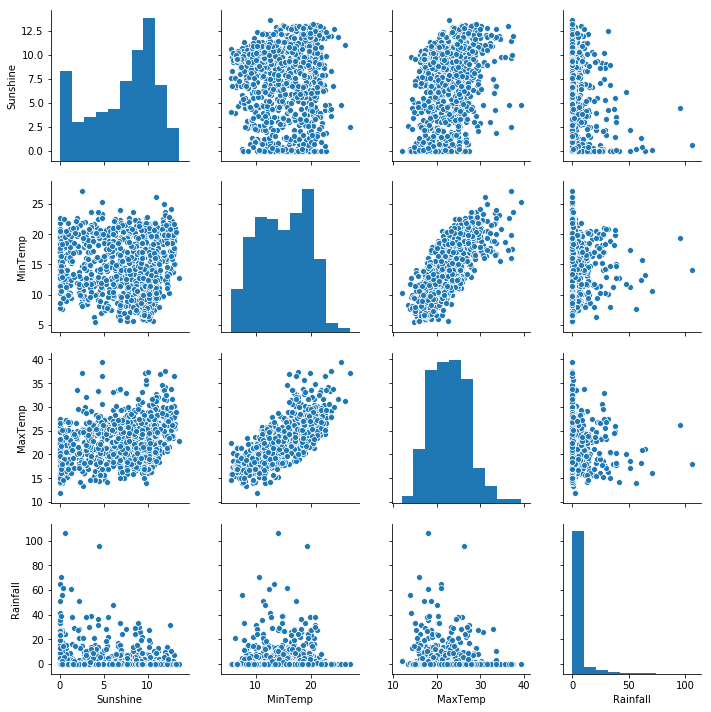

In [38]:
sns.pairplot(weatherAUS.loc[weatherAUS.Location == 'Sydney',['Sunshine', 'MinTemp', 'MaxTemp', 'Rainfall']].sample(1000))

## Analysis of the challenge involving Australian weather patterns
It looks as though the MinTemp and MaxTemp are normally distribute variables, very gaussian.
Rainfall looks to be skewed, and Sunshine looks to be somewhat normal, with some outliers.

What I am seeing here is that some variables look to be correlated, such as MinTemp and MaxTemp, which makes sense, as in the summer time, both the mins and the max temperatures go up.  Rainfall looks to be inversely correlated with MaxTemp, which makes sense, although Rainfall and Mintemp seem to have the same scatter plot.

Sunshine and Maxtemp seem to 